<h1><center> Task 1 </center></h1>

*~~~~ Building a scoring function to determine the desirability of the houses : *

Which variables are used by the function?

- The function uses four variables from the Kaggle dataset which are finishedsquarefeet15 (Total area of the property), roomcnt (number of rooms in the house), structuretaxvaluedollarcnt (assessed value of the property), yearbuilt (year in which the property was built)


- The scoring function with all these parameters is as following, 

desirability_score  = (2 x room_count) + year_built - (structure_tax_value_dollar / total_area)

- The idea here is to minimize the per square feet dollar cost of the property. That's why the (structure_tax_value_dollar / total_area) factor is substracted from the other values. In addition to that, the apartments built late are given priority and properties with more rooms will be given the most preference.



In [3]:
# Loading the properties file into a dataframe

import pandas as pd
import numpy as numpy
import scipy.spatial.distance as scp_dst
from scipy.spatial import distance
from sklearn.cluster import KMeans
import matplotlib.colors as clrs
import matplotlib.pyplot as plt

df = pd.read_csv('properties_2017.csv', low_memory=False)

In [4]:
# Cleaning the data required to compute the scoring function

df_clean_for_scoring = df[numpy.isfinite(df['finishedsquarefeet15'])]
df_clean_for_scoring = df_clean_for_scoring[numpy.isfinite(df_clean_for_scoring['roomcnt']) & df_clean_for_scoring['roomcnt'] != 0]
df_clean_for_scoring = df_clean_for_scoring[numpy.isfinite(df_clean_for_scoring['structuretaxvaluedollarcnt'])]
df_clean_for_scoring = df_clean_for_scoring[numpy.isfinite(df_clean_for_scoring['yearbuilt'])]
df_clean_for_scoring # has 396 rows (these might be the houses)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
396,17072870,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,1.0,NaN,79576.0,265257.0,2016.0,185681.0,2880.52,NaN,NaN,6.111002e+13
516,17101256,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,NaN,...,1.0,NaN,99619.0,278189.0,2016.0,178570.0,3182.82,NaN,NaN,6.111001e+13
585,17122643,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,...,1.0,NaN,520033.0,543419.0,2016.0,23386.0,7264.84,NaN,NaN,6.111005e+13
783,17171990,NaN,NaN,NaN,3.0,3.0,NaN,NaN,3.0,66.0,...,2.0,NaN,609150.0,2132025.0,2016.0,1522875.0,24017.74,NaN,NaN,6.111004e+13
801,17180389,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,1.0,NaN,68899.0,91841.0,2016.0,22942.0,1086.08,NaN,NaN,6.111004e+13
30061,17099149,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,105061.0,193478.0,2016.0,88417.0,2242.82,NaN,NaN,NaN
30155,17064216,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,100503.0,313125.0,2016.0,212622.0,3642.26,NaN,NaN,6.111000e+13
30201,17075814,NaN,NaN,NaN,1.5,3.0,NaN,NaN,1.5,NaN,...,1.0,NaN,382347.0,699381.0,2016.0,317034.0,7419.28,NaN,NaN,6.111002e+13
30218,17079778,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,1.0,NaN,279600.0,451752.0,2016.0,172152.0,4757.86,NaN,NaN,6.111003e+13
30547,17164943,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0,NaN,...,1.0,NaN,164848.0,347138.0,2016.0,182290.0,4164.02,NaN,NaN,6.111004e+13


In [5]:
# Compute the scoring function

df_clean_for_scoring ['desirabilityscore'] = (df_clean_for_scoring['roomcnt']*2) + (df_clean_for_scoring['yearbuilt']) - (df_clean_for_scoring['structuretaxvaluedollarcnt'] / df_clean_for_scoring['finishedsquarefeet15']) 
df_sorted_on_score = df_clean_for_scoring.sort_values(['desirabilityscore'], ascending=[False])
df_sorted_on_score

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,desirabilityscore
2282638,17231357,NaN,NaN,NaN,8.0,10.0,NaN,NaN,8.0,NaN,...,NaN,331950.0,414684.0,2016.0,82734.0,5659.22,NaN,NaN,6.111009e+13,2011.942752
2968344,17231374,NaN,NaN,NaN,6.0,6.0,NaN,NaN,6.0,NaN,...,NaN,286884.0,369618.0,2016.0,82734.0,5169.40,NaN,NaN,6.111009e+13,1987.986650
1567132,17231361,NaN,NaN,NaN,8.0,10.0,NaN,NaN,8.0,NaN,...,NaN,331950.0,414684.0,2016.0,82734.0,5667.72,NaN,NaN,6.111009e+13,1982.885504
1000213,17231360,NaN,NaN,NaN,8.0,10.0,NaN,NaN,8.0,NaN,...,NaN,331950.0,414684.0,2016.0,82734.0,5659.22,NaN,NaN,6.111009e+13,1982.885504
1417843,17231366,NaN,NaN,NaN,8.0,10.0,NaN,NaN,8.0,NaN,...,NaN,331950.0,414684.0,2016.0,82734.0,5654.10,NaN,NaN,6.111009e+13,1982.885504
2699898,17231363,NaN,NaN,NaN,8.0,10.0,NaN,NaN,8.0,NaN,...,NaN,331950.0,414684.0,2016.0,82734.0,5659.22,NaN,NaN,6.111009e+13,1982.885504
1716364,17231356,NaN,NaN,NaN,8.0,10.0,NaN,NaN,8.0,NaN,...,NaN,331950.0,414684.0,2016.0,82734.0,5667.72,NaN,NaN,6.111009e+13,1982.885504
433638,17231359,NaN,NaN,NaN,8.0,10.0,NaN,NaN,8.0,NaN,...,NaN,331950.0,414684.0,2016.0,82734.0,5654.10,NaN,NaN,6.111009e+13,1982.885504
2849047,17231358,NaN,NaN,NaN,8.0,10.0,NaN,NaN,8.0,NaN,...,NaN,331950.0,414684.0,2016.0,82734.0,5659.22,NaN,NaN,6.111009e+13,1982.885504
2550914,17231368,NaN,NaN,NaN,8.0,10.0,NaN,NaN,8.0,NaN,...,NaN,331950.0,414684.0,2016.0,82734.0,5666.02,NaN,NaN,6.111009e+13,1982.885504


In [6]:
# Top 10 desirable properties
df_sorted_on_score.head(10)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,desirabilityscore
2282638,17231357,NaN,NaN,NaN,8.0,10.0,NaN,NaN,8.0,NaN,...,NaN,331950.0,414684.0,2016.0,82734.0,5659.22,NaN,NaN,6.111009e+13,2011.942752
2968344,17231374,NaN,NaN,NaN,6.0,6.0,NaN,NaN,6.0,NaN,...,NaN,286884.0,369618.0,2016.0,82734.0,5169.40,NaN,NaN,6.111009e+13,1987.986650
1567132,17231361,NaN,NaN,NaN,8.0,10.0,NaN,NaN,8.0,NaN,...,NaN,331950.0,414684.0,2016.0,82734.0,5667.72,NaN,NaN,6.111009e+13,1982.885504
1000213,17231360,NaN,NaN,NaN,8.0,10.0,NaN,NaN,8.0,NaN,...,NaN,331950.0,414684.0,2016.0,82734.0,5659.22,NaN,NaN,6.111009e+13,1982.885504
1417843,17231366,NaN,NaN,NaN,8.0,10.0,NaN,NaN,8.0,NaN,...,NaN,331950.0,414684.0,2016.0,82734.0,5654.10,NaN,NaN,6.111009e+13,1982.885504
2699898,17231363,NaN,NaN,NaN,8.0,10.0,NaN,NaN,8.0,NaN,...,NaN,331950.0,414684.0,2016.0,82734.0,5659.22,NaN,NaN,6.111009e+13,1982.885504
1716364,17231356,NaN,NaN,NaN,8.0,10.0,NaN,NaN,8.0,NaN,...,NaN,331950.0,414684.0,2016.0,82734.0,5667.72,NaN,NaN,6.111009e+13,1982.885504
433638,17231359,NaN,NaN,NaN,8.0,10.0,NaN,NaN,8.0,NaN,...,NaN,331950.0,414684.0,2016.0,82734.0,5654.10,NaN,NaN,6.111009e+13,1982.885504
2849047,17231358,NaN,NaN,NaN,8.0,10.0,NaN,NaN,8.0,NaN,...,NaN,331950.0,414684.0,2016.0,82734.0,5659.22,NaN,NaN,6.111009e+13,1982.885504
2550914,17231368,NaN,NaN,NaN,8.0,10.0,NaN,NaN,8.0,NaN,...,NaN,331950.0,414684.0,2016.0,82734.0,5666.02,NaN,NaN,6.111009e+13,1982.885504


In [7]:
# 10 least desirable properties
df_sorted_on_score.tail(10)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,desirabilityscore
1820320,17073050,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,...,NaN,287390.0,744252.0,2016.0,456862.0,7882.20,NaN,NaN,6.111002e+13,1478.803571
582115,17081665,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,NaN,323575.0,497066.0,2016.0,173491.0,5280.82,NaN,NaN,6.111003e+13,1471.753185
1805455,17101720,NaN,NaN,NaN,1.5,3.0,NaN,NaN,1.5,NaN,...,NaN,413952.0,540757.0,2016.0,126805.0,6116.38,NaN,NaN,6.111001e+13,1465.600000
850848,17171888,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,NaN,459707.0,674176.0,2016.0,214469.0,7533.66,NaN,NaN,6.111004e+13,1455.168235
2043646,17102115,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,NaN,486245.0,598498.0,2016.0,112253.0,6733.34,NaN,NaN,6.111001e+13,1454.614087
2312412,17276423,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,...,NaN,342137.0,438378.0,2016.0,96241.0,4793.00,NaN,NaN,6.111007e+13,1444.232857
253689,17076964,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,336000.0,530000.0,2016.0,194000.0,5692.18,NaN,NaN,NaN,1430.005988
775757,17062792,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,866633.0,1105192.0,2016.0,238559.0,13126.86,NaN,NaN,6.111000e+13,1307.308388
585,17122643,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,...,NaN,520033.0,543419.0,2016.0,23386.0,7264.84,NaN,NaN,6.111005e+13,1171.162975
552512,17161800,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,560476.0,735183.0,2016.0,174707.0,8787.02,NaN,NaN,6.111003e+13,469.230769


<h1><center> Task 2 & 3 </center></h1>

In [8]:
# Cleaning the data required to compute the pair-wise distance

df_clean_for_distance = df_sorted_on_score[numpy.isfinite(df_sorted_on_score['latitude'])]
df_clean_for_distance = df_clean_for_distance[numpy.isfinite(df_clean_for_distance['longitude'])]
df_clean_for_distance = df_clean_for_distance[numpy.isfinite(df_clean_for_distance['regionidzip'])]

# Can't use this!
# df_clean_for_distance = df_clean_for_distance[numpy.isfinite(df_clean_for_distance['architecturalstyletypeid'])]
df_clean_for_distance = df_clean_for_distance[numpy.isfinite(df_clean_for_distance['finishedsquarefeet15'])]
df_clean_for_distance = df_clean_for_distance[numpy.isfinite(df_clean_for_distance['unitcnt'])]
df_clean_for_distance = df_clean_for_distance[numpy.isfinite(df_clean_for_distance['roomcnt'])]
# df_clean_for_distance = df_clean_for_distance[numpy.isfinite(df_clean_for_distance['poolcnt'])]
# df_clean_for_distance = df_clean_for_distance[numpy.isfinite(df_clean_for_distance['storytypeid'])]



In [9]:
# from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance
from sklearn.cluster import KMeans
import matplotlib.colors as clrs
import matplotlib.pyplot as plt
import numpy as np

df_clean_for_distance_subset = df_clean_for_distance[['latitude','longitude','regionidzip','finishedsquarefeet15','unitcnt','roomcnt']] # has 181796 rows 
df_clean_for_distance_subset_list = df_clean_for_distance_subset.values.tolist()
head_first = df_clean_for_distance_subset_list[100]
head_second = df_clean_for_distance_subset_list[311]
head_first_head_second_dist = distance.euclidean(head_first, head_second)/10000
# head_first_head_second_dist
# KMeans.fit(df_clean_for_distance_subset)



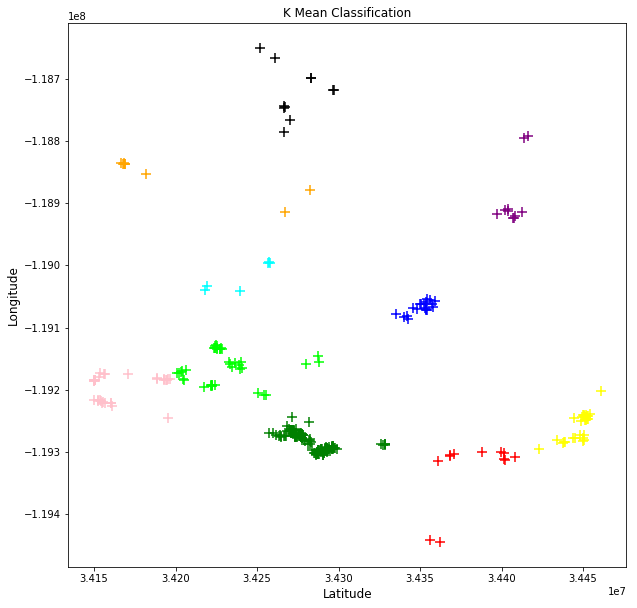

In [10]:
from scipy.spatial import distance
from sklearn.cluster import KMeans
import matplotlib.colors as clrs
import matplotlib.pyplot as plt

df_clean_for_clustering = df_sorted_on_score[numpy.isfinite(df_sorted_on_score['latitude'])]
df_clean_for_clustering = df_clean_for_clustering[numpy.isfinite(df_clean_for_clustering['longitude'])]
df_clean_for_clustering = df_clean_for_clustering[numpy.isfinite(df_clean_for_clustering['regionidzip'])]
df_clean_for_clustering = df_clean_for_clustering[numpy.isfinite(df_clean_for_clustering['finishedsquarefeet15'])]
df_clean_for_clustering = df_clean_for_clustering[numpy.isfinite(df_clean_for_clustering['unitcnt'])] 
df_clean_for_clustering = df_clean_for_clustering[numpy.isfinite(df_clean_for_clustering['roomcnt'])]
df_clean_for_clustering_subset = df_clean_for_clustering[['latitude','longitude','regionidzip','finishedsquarefeet15','unitcnt','roomcnt']]

km = KMeans(n_clusters=10, max_iter=1000)
km.fit(df_clean_for_clustering_subset)
km.labels_

# View the results
# Set the size of the plot
plt.figure(figsize=(10,10))

# Create a colormap
colormap = numpy.array(['red', 'lime', 'black', 'green','blue', 'purple', 'yellow', 'pink', 'orange', 'cyan'])

# clrs.get_named_colors_mapping()

# Plot the Original Classifications
# plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
# plt.title('Real Classification')

# Plot the Models Classifications
# plt.subplot(1, 2, 2)

plt.title('K Mean Classification')
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.scatter(df_clean_for_distance_subset.latitude, df_clean_for_distance_subset.longitude, c=colormap[km.labels_], marker='+', s=100)
plt.show()



<h1><center> Task 4 </center></h1>

In [11]:
df_new = df[numpy.isfinite(df['regionidzip'])]
df_new_unique_zip = df_new.regionidzip.unique()

# df_new_unique_zip

df_zip_income = pd.read_csv('MedianZIP_Income.csv', low_memory=False)

# Used mean salary in the data where values were missing

# df_left_unique_zip = df_new_unique_zip.notin(df_zip_income['regionidzip'].values)
# df_left_unique_zip
# print (list(set(df_new_unique_zip)-set(df_zip_income['regionidzip'].values)))
# df_zip_income.columns.values[0] = 'regionidzip'


df_zip_median_salary = df_zip_income.loc[df_zip_income['regionidzip'].isin(df_new_unique_zip)]
# df_zip_median_salary
df_with_income = pd.merge(df_zip_median_salary, df_new, on='regionidzip', how='outer')
df_with_income = df_with_income[numpy.isfinite(df_with_income['mediansalary'])]
# df_with_income
df_with_income.head(10)                                      

,regionidzip,mediansalary,Pop,Unnamed: 3,Unnamed: 4,Unnamed: 5,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,95982.0,69207.0,"3,221",NaN,NaN,NaN,12185779,NaN,NaN,NaN,...,NaN,NaN,86579.0,259740.0,2016.0,173161.0,3585.05,NaN,NaN,6.037533e+13
1,95982.0,69207.0,"3,221",NaN,NaN,NaN,12185955,NaN,NaN,NaN,...,NaN,NaN,160834.0,275097.0,2016.0,114263.0,3795.73,NaN,NaN,6.037533e+13
2,95982.0,69207.0,"3,221",NaN,NaN,NaN,12186260,NaN,NaN,NaN,...,NaN,NaN,207106.0,419389.0,2016.0,212283.0,6273.26,NaN,NaN,6.037533e+13
3,95982.0,69207.0,"3,221",NaN,NaN,NaN,12186283,NaN,NaN,NaN,...,NaN,NaN,52488.0,213202.0,2016.0,160714.0,3084.49,Y,15.0,6.037533e+13
4,95982.0,69207.0,"3,221",NaN,NaN,NaN,12186329,NaN,NaN,NaN,...,NaN,NaN,224026.0,362553.0,2016.0,138527.0,5613.07,NaN,NaN,6.037533e+13
5,95982.0,69207.0,"3,221",NaN,NaN,NaN,12186418,NaN,NaN,NaN,...,NaN,NaN,33631.0,77353.0,2016.0,43722.0,1424.32,NaN,NaN,6.037533e+13
6,95982.0,69207.0,"3,221",NaN,NaN,NaN,12186799,NaN,NaN,NaN,...,NaN,NaN,90840.0,177443.0,2016.0,86603.0,2675.18,NaN,NaN,6.037533e+13
7,95982.0,69207.0,"3,221",NaN,NaN,NaN,12186868,NaN,NaN,NaN,...,NaN,NaN,64757.0,276703.0,2016.0,211946.0,3766.48,NaN,NaN,6.037533e+13
8,95982.0,69207.0,"3,221",NaN,NaN,NaN,12187006,NaN,NaN,NaN,...,NaN,NaN,74869.0,155977.0,2016.0,81108.0,2428.99,NaN,NaN,6.037533e+13
9,95982.0,69207.0,"3,221",NaN,NaN,NaN,12187125,NaN,NaN,NaN,...,NaN,NaN,146440.0,256266.0,2016.0,109826.0,3880.61,NaN,NaN,6.037533e+13


In [12]:
# THIS CODE COMBINES THE ERROR-TABLE (training data) AND FEATURE TABLE (properties data with median salary) (OUTER JOIN)


train_df = pd.read_csv('train_2017.csv') # TODO: Need to change these files' locations

parcel_value_list = train_df['parcelid']

df_filter_tained_parcel_ids = df_with_income[df_with_income.parcelid.isin(parcel_value_list)]

parcel_value_list2 = df_filter_tained_parcel_ids['parcelid']

train_df_2 = train_df[train_df.parcelid.isin(parcel_value_list2)]
sorted_df_filter_tained_parcel_ids = df_filter_tained_parcel_ids.sort_values(by='parcelid', ascending=1)

train_df_2 = train_df_2.drop_duplicates(['parcelid'], keep='last') #90150
sorted_train_df_2 = train_df_2.sort_values(by='parcelid', ascending=1)

train_df_joined = pd.merge(sorted_df_filter_tained_parcel_ids, sorted_train_df_2, on='parcelid', how='outer')
train_df_joined
# train_df_joined.head(10)


,regionidzip,mediansalary,Pop,Unnamed: 3,Unnamed: 4,Unnamed: 5,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,96339.0,50938.0,NaN,NaN,NaN,NaN,10711855,NaN,NaN,NaN,...,249655.0,624139.0,2016.0,374484.0,7659.36,NaN,NaN,6.037113e+13,-0.007357,2017-07-07
1,96339.0,50938.0,NaN,NaN,NaN,NaN,10711877,1.0,NaN,NaN,...,253000.0,660000.0,2016.0,407000.0,8123.91,NaN,NaN,6.037113e+13,0.021066,2017-08-29
2,96339.0,50938.0,NaN,NaN,NaN,NaN,10711888,1.0,NaN,NaN,...,257591.0,542923.0,2016.0,285332.0,6673.24,NaN,NaN,6.037113e+13,0.077174,2017-04-04
3,96339.0,50938.0,NaN,NaN,NaN,NaN,10711910,NaN,NaN,NaN,...,57968.0,78031.0,2016.0,20063.0,1116.46,NaN,NaN,6.037113e+13,-0.041238,2017-03-17
4,96339.0,50938.0,NaN,NaN,NaN,NaN,10711923,NaN,NaN,NaN,...,167869.0,415459.0,2016.0,247590.0,5239.85,NaN,NaN,6.037113e+13,-0.009496,2017-03-24
5,96339.0,50938.0,NaN,NaN,NaN,NaN,10711945,1.0,NaN,NaN,...,85298.0,424414.0,2016.0,339116.0,5376.97,NaN,NaN,6.037113e+13,0.001271,2017-01-30
6,96339.0,50938.0,NaN,NaN,NaN,NaN,10711956,1.0,NaN,NaN,...,120814.0,525391.0,2016.0,404577.0,6571.23,NaN,NaN,6.037113e+13,0.023298,2017-07-03
7,96339.0,50938.0,NaN,NaN,NaN,NaN,10711995,1.0,NaN,NaN,...,347937.0,579975.0,2016.0,232038.0,7084.30,NaN,NaN,6.037113e+13,0.041138,2017-03-09
8,96339.0,50938.0,NaN,NaN,NaN,NaN,10712005,1.0,NaN,NaN,...,70188.0,92943.0,2016.0,22755.0,1272.29,NaN,NaN,6.037113e+13,0.012092,2017-08-01
9,96339.0,50938.0,NaN,NaN,NaN,NaN,10712007,1.0,NaN,NaN,...,67912.0,90667.0,2016.0,22755.0,1325.62,NaN,NaN,6.037113e+13,0.465167,2017-02-22


Coefficients: 
 [  1.99633019e-05  -3.21733882e-09]
Mean squared error: 0.024463504
Variance score: -0.026125879


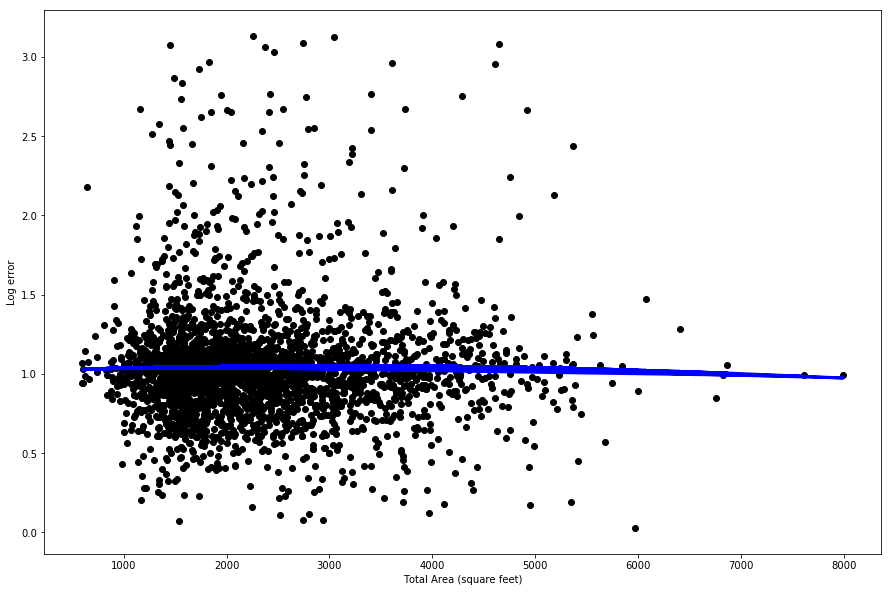

In [97]:
# Exp:1 (Old model)

# Results
# Coefficients: 
#  [  1.99633019e-05  -3.21733882e-09]
# Mean squared error: 0.024463504
# Variance score: -0.026125879
    
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Improvement_0 : Removed the NaN value from the training data
train_df_joined_no_logerror_nan = train_df_joined[numpy.isfinite(train_df_joined['logerror'])]

# Improvement_1 : Filter the outlier values from the training data
train_df_joined_no_logerror_nan = train_df_joined_no_logerror_nan [train_df_joined_no_logerror_nan ['logerror'] < 0.5]

# Improvement_1 : Filter the outlier values from the training data
train_df_joined_no_logerror_finishedsquarefeet15_nan = train_df_joined_no_logerror_nan[numpy.isfinite(train_df_joined_no_logerror_nan['finishedsquarefeet15'])]
train_df_joined_no_logerror_finishedsquarefeet15_nan = train_df_joined_no_logerror_finishedsquarefeet15_nan [train_df_joined_no_logerror_finishedsquarefeet15_nan ['finishedsquarefeet15'] < 10000]


train_x1 = train_df_joined_no_logerror_finishedsquarefeet15_nan.finishedsquarefeet15.values

# Improvement_2 : Converting the model to polynomial regression y = (a*x)+(a*x^2) from linear regression
train_x2 = np.power(train_df_joined_no_logerror_finishedsquarefeet15_nan.finishedsquarefeet15.values, 2)
train_x = np.vstack((train_x1, train_x2)).T

train_y = train_df_joined_no_logerror_finishedsquarefeet15_nan.logerror.values

# Improvement_3 : Scaling the y-axis to f(y) = 10^y values, where the y value is 'finishedsquarefeet15'
train_y = np.power(10,train_y)

regr1 = linear_model.LinearRegression()
regr1.fit(train_x, train_y)

# coefficients
print('Coefficients: \n', regr1.coef_)

test_x = train_x
test_y = train_y

pred_y = regr1.predict(test_x)

# The mean squared error
print("Mean squared error: %.9f"
      % mean_squared_error(np.log10(test_y), np.log10(pred_y)))

# variance score
print("Variance score: %.9f"
      % r2_score(np.log10(test_y), np.log10(pred_y)))


plt.rcParams['figure.figsize']=(15,10)
plt.xlabel("Total Area (square feet)")
plt.ylabel("Log error")
plt.scatter(train_x1, train_y,  color='black')
plt.plot(train_x1, pred_y, color='blue', linewidth=3)
plt.show()

Coefficients: 
 [ -5.99209308e-07   7.32617324e-12]
Mean squared error: 0.013699432
Variance score: -0.011092106


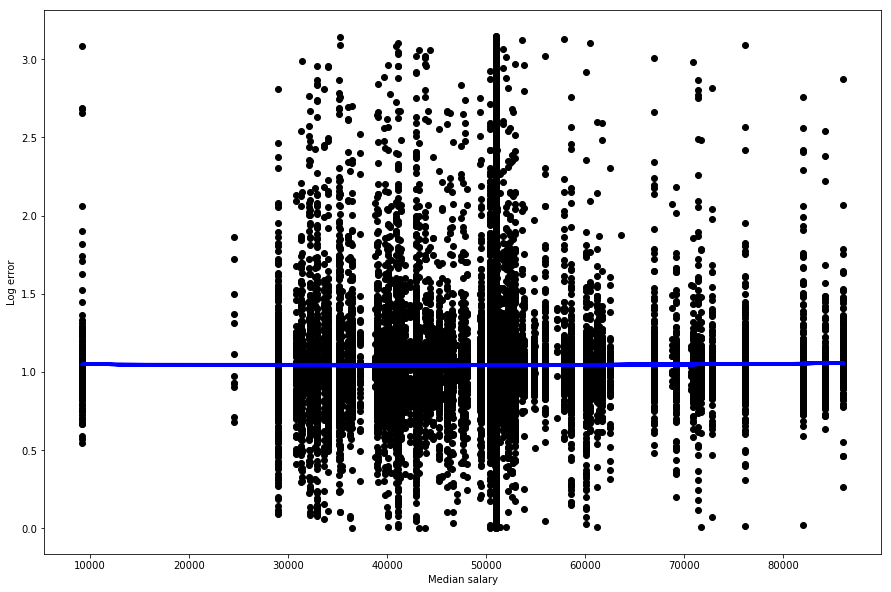

In [14]:
# Exp:2 (New model - with only income as a feature)

# Results
# Coefficients: 
#  [ -5.99209308e-07   7.32617324e-12]
# Mean squared error: 0.013699432
# Variance score: -0.011092106
    
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Improvement_0 : Removed the NaN value from the training data
train_df_joined_no_logerror_nan = train_df_joined[numpy.isfinite(train_df_joined['logerror'])]

# Improvement_1 : Filter the outlier values from the training data
train_df_joined_no_logerror_nan = train_df_joined_no_logerror_nan [train_df_joined_no_logerror_nan ['logerror'] < 0.5]

# Improvement_1 : Filter the outlier values from the training data
train_df_joined_no_logerror_finishedsquarefeet15_nan = train_df_joined_no_logerror_nan[numpy.isfinite(train_df_joined_no_logerror_nan['mediansalary'])]
# train_df_joined_no_logerror_finishedsquarefeet15_nan = train_df_joined_no_logerror_finishedsquarefeet15_nan [train_df_joined_no_logerror_finishedsquarefeet15_nan ['regionidzip']]


train_x1 = train_df_joined_no_logerror_finishedsquarefeet15_nan.mediansalary.values

# Improvement_2 : Converting the model to polynomial regression y = (a*x)+(a*x^2) from linear regression
train_x2 = np.power(train_df_joined_no_logerror_finishedsquarefeet15_nan.mediansalary.values, 2)
train_x = np.vstack((train_x1, train_x2)).T

train_y = train_df_joined_no_logerror_finishedsquarefeet15_nan.logerror.values

# Improvement_3 : Scaling the y-axis to f(y) = 10^y values, where the y value is 'finishedsquarefeet15'
train_y = np.power(10,train_y)

regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

# coefficients
print('Coefficients: \n', regr.coef_)

test_x = train_x
test_y = train_y

pred_y = regr.predict(test_x)

# The mean squared error
print("Mean squared error: %.9f"
      % mean_squared_error(np.log10(test_y), np.log10(pred_y)))

# variance score
print("Variance score: %.9f"
      % r2_score(np.log10(test_y), np.log10(pred_y)))


plt.rcParams['figure.figsize']=(15,10)
plt.xlabel("Median salary")
plt.ylabel("Log error")
plt.scatter(train_x1, train_y,  color='black')
plt.plot(train_x1, pred_y, color='blue', linewidth=3)
plt.show()

Coefficients: 
 [  1.99307964e-05  -3.25572441e-09   4.63646133e-07]
Mean squared error: 0.024462457
Variance score: -0.026081951


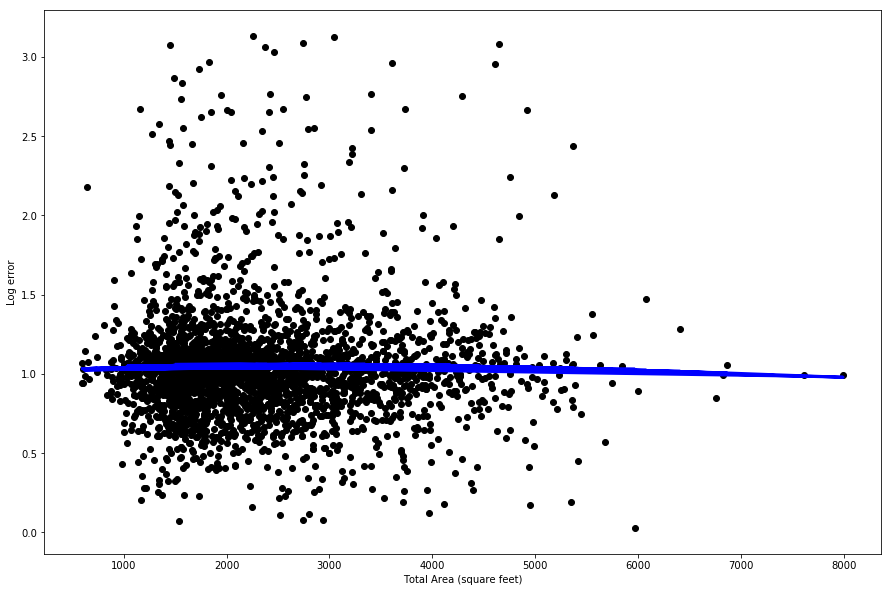

In [15]:
# Exp:3 (New model - with income and total area as features)

# Results
# Coefficients: 
#  [  1.99307964e-05  -3.25572441e-09   4.63646133e-07]
# Mean squared error: 0.024462457
# Variance score: -0.026081951

import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Improvement_0 : Removed the NaN value from the training data
train_df_joined_no_logerror_nan = train_df_joined[numpy.isfinite(train_df_joined['logerror'])]

# Improvement_1 : Filter the outlier values from the training data
train_df_joined_no_logerror_nan = train_df_joined_no_logerror_nan [train_df_joined_no_logerror_nan ['logerror'] < 0.5]

# Improvement_1 : Filter the outlier values from the training data
train_df_joined_no_logerror_finishedsquarefeet15_nan = train_df_joined_no_logerror_nan[numpy.isfinite(train_df_joined_no_logerror_nan['finishedsquarefeet15'])]
train_df_joined_no_logerror_finishedsquarefeet15_nan = train_df_joined_no_logerror_finishedsquarefeet15_nan [train_df_joined_no_logerror_finishedsquarefeet15_nan ['finishedsquarefeet15'] < 10000]

# Removed NaN from median salary
train_df_joined_no_logerror_finishedsquarefeet15_mediansalary_nan = train_df_joined_no_logerror_finishedsquarefeet15_nan[numpy.isfinite(train_df_joined_no_logerror_finishedsquarefeet15_nan['mediansalary'])]

train_x1 = train_df_joined_no_logerror_finishedsquarefeet15_mediansalary_nan.finishedsquarefeet15.values

# Converting the model to polynomial regression y = (a*x)+(a*x^2) from linear regression
train_x2 = np.power(train_df_joined_no_logerror_finishedsquarefeet15_mediansalary_nan.finishedsquarefeet15.values, 2)

train_x3 = train_df_joined_no_logerror_finishedsquarefeet15_mediansalary_nan.mediansalary.values

train_x = np.vstack((train_x1, train_x2, train_x3)).T

train_y = train_df_joined_no_logerror_finishedsquarefeet15_mediansalary_nan.logerror.values

# Improvement_3 : Scaling the y-axis to f(y) = 10^y values, where the y value is 'finishedsquarefeet15'
train_y = np.power(10,train_y)

regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

# coefficients
print('Coefficients: \n', regr.coef_)

test_x = train_x
test_y = train_y

pred_y = regr.predict(test_x)

# The mean squared error
print("Mean squared error: %.9f"
      % mean_squared_error(np.log10(test_y), np.log10(pred_y)))

# variance score
print("Variance score: %.9f"
      % r2_score(np.log10(test_y), np.log10(pred_y)))


plt.rcParams['figure.figsize']=(15,10)
plt.xlabel("Total Area (square feet)")
plt.ylabel("Log error")
plt.scatter(train_x1, train_y,  color='black')
plt.plot(train_x1, pred_y, color='blue', linewidth=3)
plt.show()

In [118]:
from sklearn import ensemble


# Improvement_0 : Removed the NaN value from the training data
train_df_joined_no_logerror_nan = train_df_joined[numpy.isfinite(train_df_joined['logerror'])]

# Improvement_1 : Filter the outlier values from the training data
train_df_joined_no_logerror_nan = train_df_joined_no_logerror_nan [train_df_joined_no_logerror_nan ['logerror'] < 0.5]

# Improvement_1 : Filter the outlier values from the training data
train_df_joined_no_logerror_finishedsquarefeet15_nan = train_df_joined_no_logerror_nan[numpy.isfinite(train_df_joined_no_logerror_nan['finishedsquarefeet15'])]
train_df_joined_no_logerror_finishedsquarefeet15_nan = train_df_joined_no_logerror_finishedsquarefeet15_nan [train_df_joined_no_logerror_finishedsquarefeet15_nan ['finishedsquarefeet15'] < 10000]


train_x1 = train_df_joined_no_logerror_finishedsquarefeet15_nan.finishedsquarefeet15.values

# Improvement_2 : Converting the model to polynomial regression y = (a*x)+(a*x^2) from linear regression
train_x2 = np.power(train_df_joined_no_logerror_finishedsquarefeet15_nan.finishedsquarefeet15.values, 2)
train_x = train_x1.reshape(-1, 1)
train_x

train_y = train_df_joined_no_logerror_finishedsquarefeet15_nan.logerror.values

# print (str(train_x.shape) + " and " + str(train_y.shape))

# Improvement_3 : Scaling the y-axis to f(y) = 10^y values, where the y value is 'finishedsquarefeet15'
train_y = np.power(10,train_y)

# regr1 = linear_model.LinearRegression()
# regr1.fit(train_x, train_y)


clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2, learning_rate=0.1, loss='ls')
clf.fit(train_x, train_y)

test_x = train_x
test_y = train_y
clf.score(test_x, test_y)



0.45506050510512075

<h1><center> Task 5 </center></h1>

In [16]:
import pandas as pd
import numpy as numpy

df = pd.read_csv('properties_2017.csv', low_memory=False) # TODO: Need to change these files' locations

df_sample_submission = pd.read_csv('submission_v1.csv', low_memory=False) # TODO: Need to change these files' locations

df_zip_income = pd.read_csv('MedianZIP_Income.csv', low_memory=False)

df_new = df[numpy.isfinite(df['regionidzip'])]
df_new_unique_zip = df_new.regionidzip.unique()

# df_new_unique_zip


# Used mean salary in the data where values were missing

# df_left_unique_zip = df_new_unique_zip.notin(df_zip_income['regionidzip'].values)
# df_left_unique_zip
# print (list(set(df_new_unique_zip)-set(df_zip_income['regionidzip'].values)))
# df_zip_income.columns.values[0] = 'regionidzip'


df_zip_median_salary = df_zip_income.loc[df_zip_income['regionidzip'].isin(df_new_unique_zip)]
# df_zip_median_salary
df_with_income = pd.merge(df_zip_median_salary, df_new, on='regionidzip', how='outer')
df_with_income = df_with_income[numpy.isfinite(df_with_income['mediansalary'])]
# df_with_income
# df_with_income
# df_with_income.head(10)        


In [60]:
# Creating submission.csv to upload on Kaggle

parcel_value_list = df_sample_submission['ParcelId']

df_sampled = df_with_income[df_with_income.parcelid.isin(parcel_value_list)] #2985217 
df_sampled = df_sampled[['parcelid', 'finishedsquarefeet15', 'mediansalary']]

df_sampled = df_sampled.fillna(df_sampled.mean())
df_sampled.head(10)

# Note: Using the ^^mean value instead of removing the NaN rows.
df_sampled_no_struct_val_nan = df_sampled[numpy.isfinite(df_sampled['finishedsquarefeet15'])]
df_sampled_no_finishedsquarefeet15_mediansalary_nan = df_sampled_no_struct_val_nan[numpy.isfinite(df_sampled_no_struct_val_nan['mediansalary'])]


test_x1 = df_sampled_no_finishedsquarefeet15_mediansalary_nan['finishedsquarefeet15']
test_x2 = np.power(df_sampled_no_finishedsquarefeet15_mediansalary_nan.finishedsquarefeet15.values, 2)
train_x3 = df_sampled_no_finishedsquarefeet15_mediansalary_nan.mediansalary.values
test_x = np.vstack((test_x1, test_x2, train_x3)).T

# test_x.shape #190798, 2
# test_x.shape

pred_y_2017 = regr.predict(test_x)
pred_y_2017 = np.log10(np.absolute(pred_y_2017))

parcelids_non_nan = df_sampled_no_finishedsquarefeet15_mediansalary_nan['parcelid']

result_parcelids_non_nan_logerror = np.vstack((parcelids_non_nan, pred_y_2017)).T
# result_parcelids_non_nan_logerror

raw_data = {'ParcelId': parcelids_non_nan, '201710': pred_y_2017}
df_result_parcelids_non_nan_logerror = pd.DataFrame(raw_data, columns = ['ParcelId', '201710'])

raw_data_2 = {'ParcelId': parcel_value_list}
df_sample_submission_only_parcelIds = pd.DataFrame(raw_data_2, columns = ['ParcelId'])

df_final_submission = pd.merge(df_result_parcelids_non_nan_logerror, df_sample_submission_only_parcelIds, on='ParcelId', how='outer')

# len(df_final_submission) - df_final_submission.count()
# df.isnull().sum()
df_final_submission = df_final_submission.fillna(df_final_submission.mean())


# df_final_submission['201611'] = df_final_submission['201610']
# df_final_submission['201612'] = df_final_submission['201610']
df_sample_submission['201710'] = df_final_submission['201710']
df_sample_submission['201711'] = df_final_submission['201710']
df_sample_submission['201712'] = df_final_submission['201710']

df_sample_submission.to_csv('submission_v1_and_2017_data.csv', sep=',', index=False)

In [106]:
# Creating submission.csv to upload on Kaggle (2 - only with finishedsquarefeet15)

parcel_value_list = df_sample_submission['ParcelId']

df_sampled = df_with_income[df_with_income.parcelid.isin(parcel_value_list)] #2985217 
df_sampled = df_sampled[['parcelid', 'finishedsquarefeet15', 'mediansalary']]

df_sampled = df_sampled.fillna(df_sampled.mean())
df_sampled.head(10)

# Note: Using the ^^mean value instead of removing the NaN rows.
df_sampled_no_struct_val_nan = df_sampled[numpy.isfinite(df_sampled['finishedsquarefeet15'])]
df_sampled_no_finishedsquarefeet15_mediansalary_nan = df_sampled_no_struct_val_nan[numpy.isfinite(df_sampled_no_struct_val_nan['mediansalary'])]


test_x1 = df_sampled_no_finishedsquarefeet15_mediansalary_nan['finishedsquarefeet15']
test_x2 = np.power(df_sampled_no_finishedsquarefeet15_mediansalary_nan.finishedsquarefeet15.values, 2)
train_x3 = df_sampled_no_finishedsquarefeet15_mediansalary_nan.mediansalary.values
test_x = np.vstack((test_x1, test_x2)).T

# test_x.shape #190798, 2
# test_x.shape

pred_y_2017 = clf.predict(test_x)

# pred_y_2017 = np.log10(pred_y_2017)
pred_y_2017 = np.log10(np.absolute(pred_y_2017))

parcelids_non_nan = df_sampled_no_finishedsquarefeet15_mediansalary_nan['parcelid']

result_parcelids_non_nan_logerror = np.vstack((parcelids_non_nan, pred_y_2017)).T
# result_parcelids_non_nan_logerror

raw_data = {'ParcelId': parcelids_non_nan, '201710': pred_y_2017}
df_result_parcelids_non_nan_logerror = pd.DataFrame(raw_data, columns = ['ParcelId', '201710'])

raw_data_2 = {'ParcelId': parcel_value_list}
df_sample_submission_only_parcelIds = pd.DataFrame(raw_data_2, columns = ['ParcelId'])

df_final_submission = pd.merge(df_result_parcelids_non_nan_logerror, df_sample_submission_only_parcelIds, on='ParcelId', how='outer')

# len(df_final_submission) - df_final_submission.count()
# df.isnull().sum()
df_final_submission = df_final_submission.fillna(df_final_submission.mean())


# df_final_submission['201611'] = df_final_submission['201610']
# df_final_submission['201612'] = df_final_submission['201610']
df_sample_submission['201710'] = df_final_submission['201710']
df_sample_submission['201711'] = df_final_submission['201710']
df_sample_submission['201712'] = df_final_submission['201710']

df_sample_submission.to_csv('submission_v1_and_2017_data_2.csv', sep=',', index=False)

<h1><center> Task 6 </center></h1>

In [107]:
# Calculating the mean absolute error for "estimated-logerror" with "actual-logerror"

train_df_joined_parcelId_logerror = train_df_joined[['parcelid','logerror']] 
train_df_joined_parcelId_logerror = train_df_joined_parcelId_logerror[numpy.isfinite(train_df_joined_parcelId_logerror['parcelid'])]
train_df_joined_parcelId_logerror = train_df_joined_parcelId_logerror[numpy.isfinite(train_df_joined_parcelId_logerror['logerror'])]
train_df_joined_parcelId_logerror  

df_sample_submission_parcelId_logerror = df_sample_submission[['ParcelId', '201710']]
df_sample_submission_parcelId_logerror = df_sample_submission_parcelId_logerror[numpy.isfinite(df_sample_submission_parcelId_logerror['ParcelId'])]
df_sample_submission_parcelId_logerror = df_sample_submission_parcelId_logerror[numpy.isfinite(df_sample_submission_parcelId_logerror['201710'])]

df_sample_submission_parcelId_logerror = df_sample_submission_parcelId_logerror.rename(columns={'ParcelId': 'parcelid', '201710': 'estimatedlogerror'})

df_parcelId_logerror_estimatederror = pd.merge(train_df_joined_parcelId_logerror, df_sample_submission_parcelId_logerror, on='parcelid', how='outer')
df_parcelId_logerror_estimatederror = df_parcelId_logerror_estimatederror[numpy.isfinite(df_parcelId_logerror_estimatederror['parcelid'])]
df_parcelId_logerror_estimatederror = df_parcelId_logerror_estimatederror[numpy.isfinite(df_parcelId_logerror_estimatederror['estimatedlogerror'])]
df_parcelId_logerror_estimatederror = df_parcelId_logerror_estimatederror[numpy.isfinite(df_parcelId_logerror_estimatederror['logerror'])]
diff = np.abs(df_parcelId_logerror_estimatederror['estimatedlogerror'] - df_parcelId_logerror_estimatederror['logerror'])
estimated_mean_abs_error = diff.mean()
estimated_mean_abs_error
# df_parcelId_logerror_estimatederror.head(15)



0.38461365885099497

In [102]:

count = 0
for x in range(500):
    random_permutation = np.random.permutation(df_parcelId_logerror_estimatederror['logerror'])
    df_parcelId_logerror_estimatederror['logerror'] = random_permutation
    diff = np.abs(df_parcelId_logerror_estimatederror['estimatedlogerror'] - df_parcelId_logerror_estimatederror['logerror'])
    estimated_mean_abs_error = diff.mean()
    print ("Error" + str(estimated_mean_abs_error))
    if(estimated_mean_abs_error < 0.07171234112133791):
        count = count + 1 # number of times our model is performing worse
count = count/500
print ("Probability" + str(count))




Error0.07171162643069175
Error0.071711390926433
Error0.0717057871174042
Error0.07171163965533993
Error0.07170499358113958
Error0.07170633964510206
Error0.07172125183270607
Error0.07171070556701034
Error0.07170888250874587
Error0.07170800602649172
Error0.07172203138204061
Error0.07171158781837439
Error0.07172090301214444
Error0.07172002200620589
Error0.07170885461002804
Error0.0717089391870083
Error0.07172431663723595
Error0.07171656662744062
Error0.07169082066863716
Error0.07170187732050998
Error0.07171761510177044
Error0.07170052495050144
Error0.0716972031440762
Error0.07172143475438639
Error0.07171867945946996
Error0.07172504908799701
Error0.07170446103122086
Error0.07169803327677779
Error0.07171309614692098
Error0.07172012402686034
Error0.0717214077489182
Error0.07172316727484568
Error0.07169024875941102
Error0.07170896856776045
Error0.07168551141870845
Error0.0716960024739155
Error0.07170937215680526
Error0.07172158163618095
Error0.0717038781986651
Error0.07170227526573948
Error0.0

Error0.07171638057166718
Error0.07170137218867509
Error0.07171067484504122
Error0.07170483101671558
Error0.07172245441381501
Error0.07170456154427486
Error0.07171195790990796
Error0.07170653309280306
Error0.07171591997538261
Error0.07172129099640354
Error0.0717057585459425
Error0.07171210492785128
Error0.07169852448893586
Error0.07172395471423176
Error0.07171650560378931
Error0.07170892523163512
Error0.07171339536947584
Error0.07171114022199582
Error0.07170854745387359
Error0.07170686372291384
Error0.07171684863194001
Error0.07171945604851358
Error0.07171879356668805
Error0.0717162142040577
Error0.07170017289586839
Error0.07171033150263176
Error0.07168962803984762
Error0.0716998231368759
Error0.07170817664471911
Error0.07172128111236518
Error0.07171811637958418
Error0.07170595898042754
Error0.07172495302092496
Error0.07172234960430812
Error0.07170491409739489
Error0.07172457949027942
Error0.07171273394940934
Error0.07172168914820601
Error0.07171805592371565
Error0.07172203953010546
Err